# Analyzing Data

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import math

Importing datasets

In [2]:
data = pd.read_table("Data.csv",sep=",")
elections = pd.read_table("Elections.csv",sep=",")

pd.set_option('display.max_rows', None)
elections["Date"] = elections["Date"].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))

Parameters

In [3]:
## For statistical analysis, the dataset is sorted based on the value of 'feature' 
## Additionally, two groups are formed: G1 and G2 
## G1: from top until the entry which is equal to the median or average, based on the 'split' variable 
## G2: the rest of the list

split = "median"  # 'median' or 'avg'
feature = "cpi_num"   # 'gdp', 'cpi_num' or 'wpfi_num'
confidence = 95   # 95 or 99
year = 2019 ## as an example

Dataframe

In [4]:
## Selecting data for the defined year
tA = data[(data["years"]==year) & (data[feature].notnull())][["name",feature]].sort_values(by=feature,ascending=False)
countries = tA['name'].to_list()

tB = elections[elections["Country"].isin(countries) & (elections["Date"].dt.year < year)]
latest_dates = tB.groupby('Country')['Date'].idxmax()
tC = tB.loc[latest_dates, ['Country', 'Date', 'Coalition']]

## Merging the two datasets
t = pd.merge(tA,tC,left_on='name',right_on='Country')
t["Numeric"] = t["Coalition"].apply(lambda x:0 if x=="N" else 1)
t = t[['Country','Date','Coalition','cpi_num','Numeric']]
t

,Country,Date,Coalition,cpi_num,Numeric
0,Denmark,2015-06-18,Y,8.7,1
1,New Zealand,2017-09-23,Y,8.7,1
2,Finland,2015-04-19,Y,8.6,1
3,Switzerland,2015-10-18,Y,8.5,1
4,Singapore,2015-09-11,N,8.5,0
5,Sweden,2018-09-09,Y,8.5,1
6,Norway,2017-09-11,Y,8.4,1
7,Netherlands,2017-03-15,Y,8.2,1
8,Luxembourg,2018-10-14,Y,8.0,1
9,Germany,2017-09-24,Y,8.0,1


Bernoulli Distributions

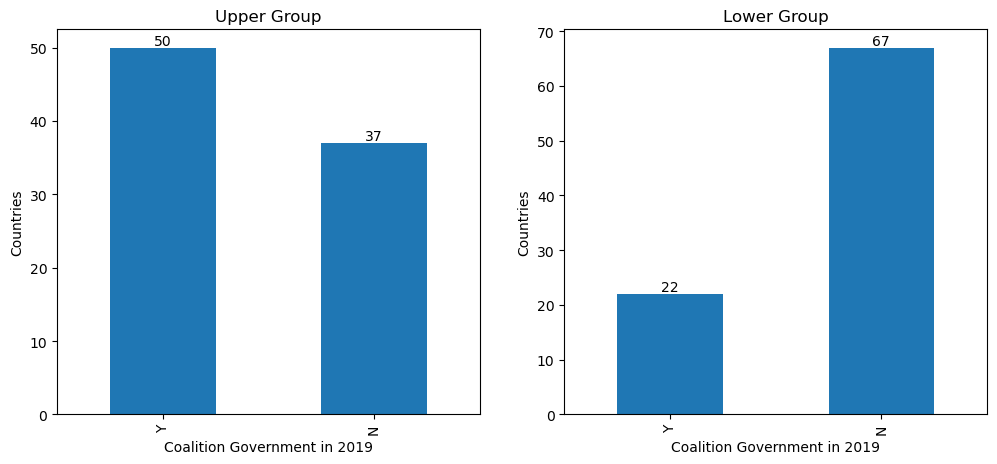

In [5]:
if split == "median":
    num = t[feature].median()
elif split == "avg":
    num = t[feature].mean()
else:
    print("Invalid split!")

## Forming the groups 1 & 2
group_1 = t[t[feature]>num]
group_2 = t[t[feature]<=num]

order = ['Y','N']

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1,figsize=(12,5))

group_1_counts = group_1['Coalition'].value_counts().loc[order]
group_2_counts = group_2['Coalition'].value_counts().loc[order]

group_1['Coalition'].value_counts().loc[order].plot(kind='bar', ax=ax1)
ax1.set_title('Upper Group')
ax1.set_xlabel('Coalition Government in 2019')
ax1.set_ylabel('Countries')
ax1.bar_label(ax1.containers[0])

group_2['Coalition'].value_counts().loc[order].plot(kind='bar', ax=ax2)
ax2.set_title('Lower Group')
ax2.set_xlabel('Coalition Government in 2019')
ax2.set_ylabel('Countries')
ax2.bar_label(ax2.containers[0])

plt.show()

# Hypothesis Testing

The proportion of countries with coalition governments for the 'upper' and the 'lower' groups are shown in the above Bernoulli distributions. We would like to check whether there is a meaningful difference between the number of countries with coalition governments from the 'upper' and the 'lower' groups.

Let

$$
\begin{align}
& \mu_1 = p_1 & \sigma_1 = \sqrt{p_1(1-p_1)}
\end{align}
$$

and

$$
\begin{align}
& \mu_2 = p_2 & \sigma_2 = \sqrt{p_2(1-p_2)}
\end{align}
$$

be the mean values and the variances of the Bernoulli distributions of the 'upper' and 'lower' groups respectively.

**Null hypothesis**: $H_0$: there is no significant difference between the proportion of countries with coalition governments in the 'upper' and 'lower' groups

**Alternative hypothesis**: $H_1$: there is significant difference 

Assuming the null hypothesis is true ($p_1=p_2$), we calculate the probability $P$ of $p_1-p_2=0.215$ within 95% confidence interval

- If $P \leq 0.05 \rightarrow$ Reject null hypothesis
- If $P > 0.05 \rightarrow$ Cannot reject null hypothesis 

In order to calculate the probability $P$, we first evaluate the $Z_{score}$ which is given by

$$
    Z_{score} = \frac{0.215-0.00}{\sigma_{p_1-p_2}}
$$

with $\sigma_{p_1-p_2}$ being the sampling distribution of difference $p_1-p_2$, given by:

$$
\sigma_{p_1-p_2} = \sqrt{\frac{p_1(1-p_1)}{n_1}+\frac{p_2(1-p_2)}{n_2}}
$$.

Subsequently, we compare it to $Z_{crit}$, which is the critical value of the distribution of difference. Hence:

- If $Z_{score} \geq Z_{crit} \rightarrow P \leq 0.05$
- If $Z_{score} < Z_{crit} \rightarrow P > 0.05$

The code below performs the statistical test by comparing $Z_{score}$ with $Z_{crit}$.

# Findings

It is found that for the corruption index (CPI) as well as the world press freedom index (WPFI), the null hypothesis is rejected for all years, demonstrating a significant difference between the 'upper' and the 'lower' group of countries. On the other hand, the gross domestic product per capita (GDP) does not have the same behaviour. 

The code below performs hypothesis testing for each year starting from 2002 

In [6]:
year = [i for i in range(2002,2022)]
split = "median"  # 'median' or 'avg'
feature = ["gdp","cpi_num","wpfi_num"]   # 'gdp', 'cpi_num' or 'wpfi_num'
confidence = 95   # 95 or 99

res = []

for j in feature:
    s = []
    for i in range(len(year)):
        tA = data[(data["years"]==year[i]) & (data[j].notnull())][["name",j]].sort_values(by=j,ascending=False)
        countries = tA['name'].to_list()

        tB = elections[(elections["Country"].isin(countries))& (elections["Date"].dt.year<year[i])].groupby("Country").max()

        t = pd.merge(tA,tB,left_on='name',right_on='Country')
        t["Numeric"] = t["Coalition"].apply(lambda x:0 if x=="N" else 1)

        if split == "median":
            num = t[j].median()
        elif split == "avg":
            num = t[j].mean()
        else:
            print("Invalid split!")

        group_1 = t[t[j]>num]
        group_2 = t[t[j]<=num]

        nY = t[t["Coalition"]=="Y"]["Coalition"].count()
        total = len(t)
        nY1 = group_1[group_1["Coalition"]=="Y"]["Coalition"].count()
        nY2 = group_2[group_2["Coalition"]=="Y"]["Coalition"].count()

        if total == 0:
            s.append("nan")
            continue
        else:
            p = (nY1 + nY2)/total
            Z_score = (group_1["Numeric"].mean()-group_2["Numeric"].mean())/(math.sqrt(p*(1-p)/len(group_1)+p*(1-p)/len(group_2)))

            if confidence == 95:
                Z_crit = 1.96
            if confidence == 99:
                Z_crit = 2.58

            if Z_score > Z_crit:
                s.append("Reject H0")
            if Z_score <= Z_crit:
                s.append("Accept H0")
    res.append(s)

mydict = pd.DataFrame({"Year":year,"GDP":res[0],"CPI":res[1],"WPFI":res[2]})
mydict

,Year,GDP,CPI,WPFI
0,2002,Accept H0,Reject H0,nan
1,2003,Reject H0,Reject H0,nan
2,2004,Reject H0,Reject H0,nan
3,2005,Accept H0,Reject H0,nan
4,2006,Accept H0,Reject H0,nan
5,2007,Accept H0,Reject H0,nan
6,2008,Accept H0,Reject H0,nan
7,2009,Accept H0,Reject H0,nan
8,2010,Accept H0,Reject H0,nan
9,2011,Accept H0,Reject H0,nan
